# Convolutional Neural Network & Classification: 

The objective is to build an image classifier that is capable of properly identifying 10 different categories of image. 

The data consists of various train and test samples across the four categories of image. You will notice that the data for a specific category is a singular image that has been flipped, rotated, or slightly altered in some way. 

 

# Preparation 

Package installation
You can use the keras package to solve this problem (https://keras.io/ (Links to an external site.)Links to an external site.). 

1.First Install TensorFlow with Python's pip package manager

## Requires the latest pip

pip install --upgrade pip

## Current stable release for CPU and GPU

pip install tensorflow

see link: https://www.tensorflow.org/installLinks to an external site.

2.Setup/import

import tensorflow as tf

from tensorflow import keras

see link : https://keras.io/guides/functional_api/Links to an external site.

 

Data for HW - read up on CIFAR dataset at https://www.cs.toronto.edu/~kriz/cifar.htmlLinks to an external site. 
The dataset is split into train and test.

 

In [1]:
import tensorflow as tf
from tensorflow import keras

2024-05-02 09:58:23.521788: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import numpy as np
import os
import pickle

def load_cifar10_batch(batch_filename):
    with open(batch_filename, 'rb') as file:
        batch = pickle.load(file, encoding='latin1')
    features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = batch['labels']
    return features, labels

def load_data(data_path):
    # Load all training batches
    num_train_batches = 5
    x_train, y_train = [], []
    for i in range(1, num_train_batches + 1):
        features, labels = load_cifar10_batch(os.path.join(data_path, f'data_batch_{i}'))
        x_train.append(features)
        y_train.append(labels)
    
    # Load test batch
    x_test, y_test = load_cifar10_batch(os.path.join(data_path, 'test_batch'))
    
    # Convert lists to numpy arrays
    x_train = np.concatenate(x_train)
    y_train = np.concatenate(y_train)
    
    return (x_train, y_train), (x_test, y_test)

# Path to the CIFAR-10 data
data_path = '/Users/colleenjung/Desktop/UChicago/Spring 31009_MLPredictiveAnalytics/cifar-10-batches-py'
(x_train, y_train), (x_test, y_test) = load_data(data_path)


# 1. Data Processing: 

The train & test data is pretty clean in terms of image data, but we will need to do a bit of prep work to use in our model. 

Specifically, as discussed in class you will need to augment the train dataset, and split it into train and validation.

## a) Use the ImageDataGenerator() class from keras.processing.image to build out an instance called "train_datagen" with the following parameters: 

rescale = 1./255
shear_range = 0.2
zoom_range = 0.2
horizontal_flip = True

## b) Then build your training set by using the method flow_from_directory() for training and validation

path (where training data is stored)
target_size = (64, 64)
batch_size = 32
class_mode = categorical 


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Split the training data into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Create an instance of ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Create an instance of ImageDataGenerator for validation data (no augmentation)
val_datagen = ImageDataGenerator(rescale=1./255)

# Prepare iterators
train_generator = train_datagen.flow(x_train, y_train, batch_size=32)
val_generator = val_datagen.flow(x_val, y_val, batch_size=32)


## c) Take a look at your training and validation sets: 

What is the image shape of each training observation?
How many total classes do we need to predict on? 

In [4]:
# Example to fetch one batch of data
for images, labels in train_generator:
    print("Shape of the images in one batch:", images.shape) 
    print("Shape of the labels in one batch:", labels.shape)  
    break

# Since CIFAR-10 has 10 classes
print("Number of classes:", np.unique(y_train).size)


Shape of the images in one batch: (32, 32, 32, 3)
Shape of the labels in one batch: (32,)
Number of classes: 10


# 2. Initial Classifier Build: 

Now use keras to build an initial CNN image classifier using APIs such as Sequential(), Conv2D(), MaxPooling2D(), and Flatten().

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    # First convolutional layer, with 32 filters of size 3x3
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    
    # Second convolutional layer
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    
    # Third convolutional layer
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    
    # Flattening the convolutions
    Flatten(),
    
    # Adding dense layers to bring down to the number of classes
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes in CIFAR-10
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Use sparse_categorical_crossentropy when labels are integers
    metrics=['accuracy']
)

model.summary()


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

# 3. Model Runs: 

This will be run various times with different numbers of epochs - you can also try with different number of steps_per_epoch

## a) Use fit() with the training set (Note - depending on your machine this may take a few hours, so do not wait till the last or last-1 day to complete this assignment). For the first run, use the following parameters: 

epochs = 30
steps_per_epoch = 625

In [7]:
history = model.fit(
    train_generator,
    steps_per_epoch=625,  # Number of batches per epoch
    epochs=30,  # Number of epochs
    validation_data=val_generator,
)


Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - accuracy: 0.4841 - loss: 1.4291 - val_accuracy: 0.5856 - val_loss: 1.1473
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.5271 - loss: 1.3196 - val_accuracy: 0.5996 - val_loss: 1.1209
Epoch 3/30


2024-05-02 10:09:14.721453: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5996 - val_loss: 1.1209
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.5678 - loss: 1.2403 - val_accuracy: 0.6110 - val_loss: 1.1032
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - accuracy: 0.5866 - loss: 1.1944 - val_accuracy: 0.6359 - val_loss: 1.0298
Epoch 6/30


2024-05-02 10:10:56.947340: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6359 - val_loss: 1.0298
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.6053 - loss: 1.1293 - val_accuracy: 0.6564 - val_loss: 0.9813
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - accuracy: 0.6180 - loss: 1.1109 - val_accuracy: 0.6660 - val_loss: 0.9395
Epoch 9/30


2024-05-02 10:12:43.145170: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6660 - val_loss: 0.9395
Epoch 10/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 94s 94ms/step - accuracy: 0.6338 - loss: 1.0644 - val_accuracy: 0.6613 - val_loss: 0.9653
Epoch 11/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.6462 - loss: 1.0455 - val_accuracy: 0.6853 - val_loss: 0.8820
Epoch 12/30


2024-05-02 10:15:10.814139: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6853 - val_loss: 0.8820
Epoch 13/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 90ms/step - accuracy: 0.6512 - loss: 1.0072 - val_accuracy: 0.6971 - val_loss: 0.8716
Epoch 14/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 94ms/step - accuracy: 0.6650 - loss: 0.9699 - val_accuracy: 0.6924 - val_loss: 0.8714
Epoch 15/30


2024-05-02 10:17:40.005015: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6924 - val_loss: 0.8714
Epoch 16/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.6656 - loss: 0.9633 - val_accuracy: 0.7007 - val_loss: 0.8629
Epoch 17/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 90ms/step - accuracy: 0.6692 - loss: 0.9565 - val_accuracy: 0.7021 - val_loss: 0.8462
Epoch 18/30


2024-05-02 10:19:38.828877: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7021 - val_loss: 0.8462
Epoch 19/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.6795 - loss: 0.9257 - val_accuracy: 0.7073 - val_loss: 0.8434
Epoch 20/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.6859 - loss: 0.9225 - val_accuracy: 0.7037 - val_loss: 0.8805
Epoch 21/30


2024-05-02 10:21:24.473508: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7037 - val_loss: 0.8805
Epoch 22/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 84ms/step - accuracy: 0.6916 - loss: 0.8980 - val_accuracy: 0.7177 - val_loss: 0.8209
Epoch 23/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.6921 - loss: 0.8829 - val_accuracy: 0.7272 - val_loss: 0.7711
Epoch 24/30


2024-05-02 10:23:12.221918: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7272 - val_loss: 0.7711
Epoch 25/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 91ms/step - accuracy: 0.6977 - loss: 0.8771 - val_accuracy: 0.7089 - val_loss: 0.8314
Epoch 26/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.7047 - loss: 0.8396 - val_accuracy: 0.7105 - val_loss: 0.8454
Epoch 27/30


2024-05-02 10:25:04.902096: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7105 - val_loss: 0.8454
Epoch 28/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - accuracy: 0.7010 - loss: 0.8492 - val_accuracy: 0.7308 - val_loss: 0.7812
Epoch 29/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.7083 - loss: 0.8475 - val_accuracy: 0.7374 - val_loss: 0.7545
Epoch 30/30


2024-05-02 10:26:56.665339: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7374 - val_loss: 0.7545


# b) plot the training and validation loss and save the image file



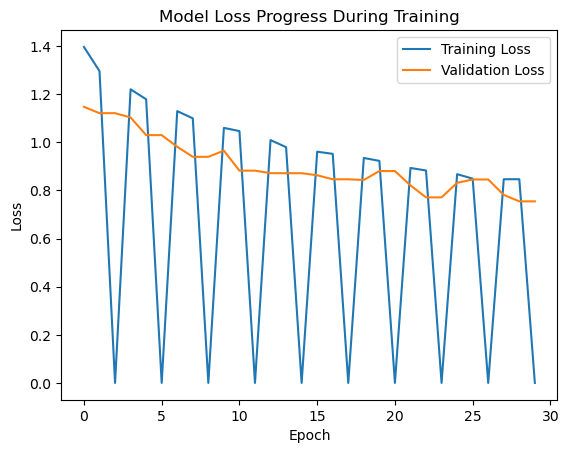

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Progress During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.savefig('training_validation_loss.png')
plt.show()


# c) save model to a file. An example is below:



In [15]:
model.save('cifar10_model.h5')  # Save the entire model to a HDF5 file


In [16]:
from tensorflow.keras.models import load_model
saved_model = load_model('cifar10_model.h5', compile=False)  # Load without compiling


# d) Predict using the saved model and the test dataset. Remember to use ImageDataGenerator() without any data augmentation.



In [17]:
from tensorflow.keras.models import load_model

# Load the saved model
saved_model = load_model('cifar10_model.h5')

# Prepare the test dataset (no augmentation, just rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow(x_test, y_test, batch_size=32, shuffle=False)

# Predict using the test dataset
predictions = saved_model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


# e) Determine accuracy.

In [20]:
from sklearn.metrics import accuracy_score

# If y_test is already integer labels:
test_accuracy = accuracy_score(y_test, predicted_classes)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 72.98%


# f) Run this process for the following combinations:

* (steps_per_epoch: 100, epochs: 2)
* (steps_per_epoch: 250, epochs: 2)
* (steps_per_epoch: 500, epochs: 2)
* (steps_per_epoch: 100, epochs: 5)
* (steps_per_epoch: 250, epochs: 5)
* (steps_per_epoch: 500, epochs: 5)
* (steps_per_epoch: 100, epochs: 9)
* (steps_per_epoch: 250, epochs: 9)
* (steps_per_epoch: 500, epochs: 9)
* (steps_per_epoch: 5, epochs: 10)

 



In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')  # Assuming 10 classes
    ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [25]:
combinations = [
    (100, 2), (250, 2), (500, 2),
    (100, 5), (250, 5), (500, 5),
    (100, 9), (250, 9), (500, 9),
    (5, 10)
]

results = []

for steps, epochs in combinations:
    model = create_model()  # Recreate the model to reset weights
    
    # Train the model
    history = model.fit(
        train_generator,
        steps_per_epoch=steps,
        epochs=epochs,
        validation_data=val_generator
    )
    
    # Evaluate on test set (ensure you have a test generator or dataset ready for this)
    test_loss, test_accuracy = model.evaluate(test_generator)
    
    # Save the result
    results.append({
        'steps_per_epoch': steps,
        'epochs': epochs,
        'test_accuracy': test_accuracy
    })
    
    # Optionally save each model
    model.save(f'cifar10_model_steps_{steps}_epochs_{epochs}.h5')

# Print all results
for result in results:
    print(f"Steps per epoch: {result['steps_per_epoch']}, Epochs: {result['epochs']}, Test Accuracy: {result['test_accuracy'] * 100:.2f}%")


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 180ms/step - accuracy: 0.1306 - loss: 2.2862 - val_accuracy: 0.2275 - val_loss: 2.0922
Epoch 2/2
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 141ms/step - accuracy: 0.2216 - loss: 2.0777 - val_accuracy: 0.3182 - val_loss: 1.8025
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.3270 - loss: 1.7958


Epoch 1/2
250/250 ━━━━━━━━━━━━━━━━━━━━ 34s 124ms/step - accuracy: 0.1720 - loss: 2.1738 - val_accuracy: 0.3498 - val_loss: 1.8001
Epoch 2/2
250/250 ━━━━━━━━━━━━━━━━━━━━ 30s 121ms/step - accuracy: 0.3156 - loss: 1.8479 - val_accuracy: 0.3972 - val_loss: 1.6564
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.4057 - loss: 1.6472


Epoch 1/2
500/500 ━━━━━━━━━━━━━━━━━━━━ 51s 95ms/step - accuracy: 0.2248 - loss: 2.0817 - val_accuracy: 0.4118 - val_loss: 1.6316
Epoch 2/2
500/500 ━━━━━━━━━━━━━━━━━━━━ 48s 95ms/step - accuracy: 0.3847 - loss: 1.6863 - val_accuracy: 0.4717 - val_loss: 1.4520
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.4716 - loss: 1.4397


Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 155ms/step - accuracy: 0.1202 - loss: 2.2826 - val_accuracy: 0.2411 - val_loss: 1.9917
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 125ms/step - accuracy: 0.2326 - loss: 2.0250 - val_accuracy: 0.3111 - val_loss: 1.8444
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 230ms/step - accuracy: 0.3015 - loss: 1.9176 - val_accuracy: 0.3654 - val_loss: 1.7406
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 184ms/step - accuracy: 0.3213 - loss: 1.8517 - val_accuracy: 0.3667 - val_loss: 1.7688
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 144ms/step - accuracy: 0.3399 - loss: 1.7915 - val_accuracy: 0.4085 - val_loss: 1.6117
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.4112 - loss: 1.5945


Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 90ms/step - accuracy: 0.1698 - loss: 2.2016 - val_accuracy: 0.3311 - val_loss: 1.8065
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.3020 - loss: 1.8802 - val_accuracy: 0.4019 - val_loss: 1.6472
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - accuracy: 0.3839 - loss: 1.6873 - val_accuracy: 0.4569 - val_loss: 1.4782
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - accuracy: 0.3945 - loss: 1.6350 - val_accuracy: 0.4903 - val_loss: 1.3931
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.4397 - loss: 1.5368 - val_accuracy: 0.5196 - val_loss: 1.3091
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5309 - loss: 1.2949


Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 41s 78ms/step - accuracy: 0.2033 - loss: 2.1072 - val_accuracy: 0.4214 - val_loss: 1.5605
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 41s 82ms/step - accuracy: 0.3857 - loss: 1.6777 - val_accuracy: 0.4522 - val_loss: 1.5138
Epoch 3/5
250/500 ━━━━━━━━━━━━━━━━━━━━ 20:20 5s/step - accuracy: 0.4209 - loss: 1.5738

2024-05-02 11:24:04.501658: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/colleenjung/anaconda3/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


500/500 ━━━━━━━━━━━━━━━━━━━━ 1226s 2s/step - accuracy: 0.4288 - loss: 1.5565 - val_accuracy: 0.5108 - val_loss: 1.3349
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 969s 2s/step - accuracy: 0.4562 - loss: 1.4734 - val_accuracy: 0.5227 - val_loss: 1.3178
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 120s 240ms/step - accuracy: 0.5033 - loss: 1.3947 - val_accuracy: 0.5610 - val_loss: 1.2001
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.5617 - loss: 1.1982


Epoch 1/9
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 198ms/step - accuracy: 0.1258 - loss: 2.2932 - val_accuracy: 0.2582 - val_loss: 2.0390
Epoch 2/9
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 137ms/step - accuracy: 0.2316 - loss: 2.0755 - val_accuracy: 0.3202 - val_loss: 1.8610
Epoch 3/9
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 127ms/step - accuracy: 0.2839 - loss: 1.9206 - val_accuracy: 0.3861 - val_loss: 1.7183
Epoch 4/9
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 147ms/step - accuracy: 0.3196 - loss: 1.8199 - val_accuracy: 0.4007 - val_loss: 1.6575
Epoch 5/9
100/100 ━━━━━━━━━━━━━━━━━━━━ 49s 489ms/step - accuracy: 0.3611 - loss: 1.7481 - val_accuracy: 0.4234 - val_loss: 1.5784
Epoch 6/9
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 232ms/step - accuracy: 0.3524 - loss: 1.7268 - val_accuracy: 0.4476 - val_loss: 1.5383
Epoch 7/9
100/100 ━━━━━━━━━━━━━━━━━━━━ 399s 4s/step - accuracy: 0.4077 - loss: 1.6551 - val_accuracy: 0.4523 - val_loss: 1.5270
Epoch 8/9
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 257ms/step - accuracy: 0.4066 - loss: 1.5952 - va

Epoch 1/9
250/250 ━━━━━━━━━━━━━━━━━━━━ 94s 367ms/step - accuracy: 0.1793 - loss: 2.1796 - val_accuracy: 0.3695 - val_loss: 1.7458
Epoch 2/9
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 95ms/step - accuracy: 0.3243 - loss: 1.8232 - val_accuracy: 0.4290 - val_loss: 1.5593
Epoch 3/9
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 92ms/step - accuracy: 0.3841 - loss: 1.6636 - val_accuracy: 0.4601 - val_loss: 1.4419
Epoch 4/9
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 98ms/step - accuracy: 0.4228 - loss: 1.5628 - val_accuracy: 0.4849 - val_loss: 1.3969
Epoch 5/9
250/250 ━━━━━━━━━━━━━━━━━━━━ 29s 116ms/step - accuracy: 0.4585 - loss: 1.4885 - val_accuracy: 0.5240 - val_loss: 1.3264
Epoch 6/9


2024-05-02 11:57:16.756735: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5240 - val_loss: 1.3264
Epoch 7/9
250/250 ━━━━━━━━━━━━━━━━━━━━ 30s 109ms/step - accuracy: 0.4903 - loss: 1.4435 - val_accuracy: 0.5466 - val_loss: 1.2631
Epoch 8/9
250/250 ━━━━━━━━━━━━━━━━━━━━ 37s 146ms/step - accuracy: 0.4952 - loss: 1.3836 - val_accuracy: 0.5598 - val_loss: 1.2294
Epoch 9/9
250/250 ━━━━━━━━━━━━━━━━━━━━ 102s 408ms/step - accuracy: 0.5056 - loss: 1.3635 - val_accuracy: 0.5338 - val_loss: 1.3147
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.5386 - loss: 1.2979


Epoch 1/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 65s 122ms/step - accuracy: 0.2366 - loss: 2.0464 - val_accuracy: 0.4121 - val_loss: 1.6289
Epoch 2/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 40s 80ms/step - accuracy: 0.3956 - loss: 1.6505 - val_accuracy: 0.4737 - val_loss: 1.4072
Epoch 3/9
250/500 ━━━━━━━━━━━━━━━━━━━━ 17s 70ms/step - accuracy: 0.4488 - loss: 1.5094

2024-05-02 12:02:24.708802: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


500/500 ━━━━━━━━━━━━━━━━━━━━ 23s 45ms/step - accuracy: 0.4519 - loss: 1.5029 - val_accuracy: 0.5128 - val_loss: 1.3371
Epoch 4/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 44s 87ms/step - accuracy: 0.4834 - loss: 1.4455 - val_accuracy: 0.5493 - val_loss: 1.2251
Epoch 5/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 108s 216ms/step - accuracy: 0.5153 - loss: 1.3613 - val_accuracy: 0.5924 - val_loss: 1.1443
Epoch 6/9
250/500 ━━━━━━━━━━━━━━━━━━━━ 27s 109ms/step - accuracy: 0.5404 - loss: 1.3051

2024-05-02 12:05:28.575065: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


500/500 ━━━━━━━━━━━━━━━━━━━━ 33s 67ms/step - accuracy: 0.5419 - loss: 1.3014 - val_accuracy: 0.6004 - val_loss: 1.1050
Epoch 7/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 59s 118ms/step - accuracy: 0.5479 - loss: 1.2712 - val_accuracy: 0.5383 - val_loss: 1.3324
Epoch 8/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 48s 95ms/step - accuracy: 0.5681 - loss: 1.2482 - val_accuracy: 0.5892 - val_loss: 1.1400
Epoch 9/9
250/500 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - accuracy: 0.5835 - loss: 1.1966

2024-05-02 12:07:43.267029: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


500/500 ━━━━━━━━━━━━━━━━━━━━ 27s 53ms/step - accuracy: 0.5875 - loss: 1.1840 - val_accuracy: 0.6436 - val_loss: 0.9873
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.6528 - loss: 0.9882


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.0901 - loss: 2.3245 - val_accuracy: 0.1152 - val_loss: 2.3048
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.1059 - loss: 2.3049 - val_accuracy: 0.1467 - val_loss: 2.2940
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.1127 - loss: 2.2988 - val_accuracy: 0.1169 - val_loss: 2.2897
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.0568 - loss: 2.2847 - val_accuracy: 0.1155 - val_loss: 2.2797
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.1319 - loss: 2.2821 - val_accuracy: 0.1275 - val_loss: 2.2636
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.1410 - loss: 2.2299 - val_accuracy: 0.1370 - val_loss: 2.2412
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.1731 - loss: 2.2476 - val_accuracy: 0.1736 - val_loss: 2.2256
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.1539 - loss: 2.2378 - val_accuracy: 0.1706 - val_loss: 2.1803
Epoch 9/10
5/

Steps per epoch: 100, Epochs: 2, Test Accuracy: 33.01%
Steps per epoch: 250, Epochs: 2, Test Accuracy: 40.16%
Steps per epoch: 500, Epochs: 2, Test Accuracy: 46.49%
Steps per epoch: 100, Epochs: 5, Test Accuracy: 40.91%
Steps per epoch: 250, Epochs: 5, Test Accuracy: 52.63%
Steps per epoch: 500, Epochs: 5, Test Accuracy: 55.84%
Steps per epoch: 100, Epochs: 9, Test Accuracy: 47.62%
Steps per epoch: 250, Epochs: 9, Test Accuracy: 53.30%
Steps per epoch: 500, Epochs: 9, Test Accuracy: 64.87%
Steps per epoch: 5, Epochs: 10, Test Accuracy: 16.79%


# g) Create a final dataframe that combines the accuracy across each combination.



In [27]:
import pandas as pd


# Convert list of dictionaries to DataFrame
df = pd.DataFrame(results)

# Rename columns to match your example if necessary
df.rename(columns={'test_accuracy': 'Accuracy'}, inplace=True)

# Display the DataFrame
df


,steps_per_epoch,epochs,Accuracy
0,100,2,0.3301
1,250,2,0.4016
2,500,2,0.4649
3,100,5,0.4091
4,250,5,0.5263
5,500,5,0.5584
6,100,9,0.4762
7,250,9,0.5330
8,500,9,0.6487
9,5,10,0.1679


# 4. Model Run with early stopping

- Train the model (with .fit()) without specifying steps_per_epoch and implementing early stopping callback with a patience = 3.

- Plot the training and validation loss curves.

- Predict using the early-stopped model and determine accuracy.

- Out of all the runs, which model has the highest test data accuracy?

In [28]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Create the model
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_model()

# Set up EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = model.fit(
    train_generator,  # assuming train_generator is set up correctly
    epochs=50,  # Maximum number of epochs (will likely stop earlier)
    validation_data=val_generator,  # assuming val_generator is set up correctly
    callbacks=[early_stopping]
)


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 127s 99ms/step - accuracy: 0.2932 - loss: 1.9087 - val_accuracy: 0.5262 - val_loss: 1.3477
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 110s 88ms/step - accuracy: 0.4711 - loss: 1.4675 - val_accuracy: 0.5916 - val_loss: 1.1545
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 93s 74ms/step - accuracy: 0.5263 - loss: 1.3307 - val_accuracy: 0.6116 - val_loss: 1.0894
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 103s 82ms/step - accuracy: 0.5603 - loss: 1.2454 - val_accuracy: 0.6372 - val_loss: 1.0160
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 95s 76ms/step - accuracy: 0.5747 - loss: 1.1994 - val_accuracy: 0.6527 - val_loss: 0.9890
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 64s 51ms/step - accuracy: 0.5952 - loss: 1.1546 - val_accuracy: 0.6591 - val_loss: 0.9721
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 65s 52ms/step - accuracy: 0.6077 - loss: 1.1128 - val_accuracy: 0.6623 - val_loss: 0.9602
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 69s 55ms/step - accuracy: 0.615

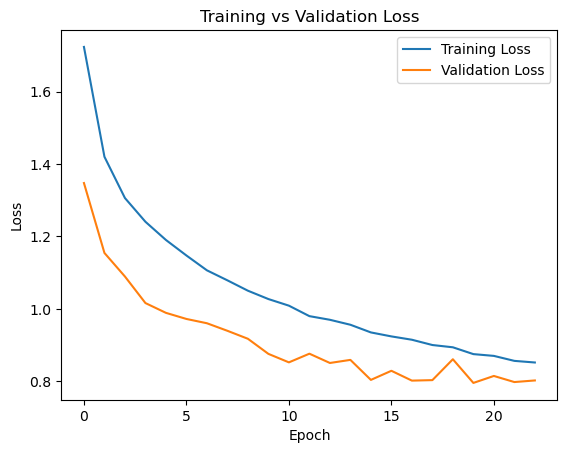

In [29]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [30]:
# Assuming test_generator is set up correctly
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.7216 - loss: 0.8198
Test Accuracy: 71.76%


In [31]:
# Assuming results is a list of dictionaries containing test accuracies
results.append({'model': 'early_stopped', 'test_accuracy': test_accuracy})

# Find the model with the highest accuracy
best_model = max(results, key=lambda x: x['test_accuracy'])
print(f"The best model is {best_model['model']} with an accuracy of {best_model['test_accuracy'] * 100:.2f}%")


The best model is early_stopped with an accuracy of 71.76%


# Conceptual Questions: 

# 5. Discuss the effect of the following on accuracy and loss (train & test): 

- Increasing the steps_per_epoch:

Increasing the **steps_per_epoach** means splitting into more batchs of data before it is considered to have completed one epoach.
This will lead to **Improved training accuracy,** as the model has more opportunities to learn from more data, and **decreased training loss,** because the model's parameters are adjusted more finely over more data.
However, this may catch noise of the data and if overfitting occurs, test loss may increase even as training loss decreases.

- Increasing the number of epochs:

**Epoch** is full cycles through the entire training dataset. Similar to steps_per_epoch, Increasing the number of epochs can **improve training accuracy and decreased training loss,** as the model has more iterations to learn from the entire dataset. However, increasing the number of epochs can lead to overfitting if not combined with appropriate regularization techniques or early stopping.

# 6. Name two uses of zero padding in CNN.

**Zero padding – add zeros around the input to have a desired number of output**

1. **Zero padding is often used to preserve the spatial dimensions of the input volume.** Without padding, the spatial dimensions of the output from convolutional layers shrink with each layer, due to the kernel overlay not fully covering the edges of the input

2. **Avoiding Information Loss: Padding helps in avoiding loss of edge information.** Since convolution predominantly focuses on the center of the kernel overlay, edges and corners of the input might be underutilized. Padding increases the area the kernel can cover, thereby incorporating edge pixels effectively and preserving information throughout the network's depth.

# 7. What is the use of a 1 x 1 kernel in CNN? 

1x1 convolution, often referred to as a pointwise convolution, is used in CNNs primarily to **manage the network depth.** It can be used to reduce the dimensionality of the input volume before applying more computationally expensive 3x3 or 5x5 convolutions. This can help in reducing the model's computational load and managing resources more efficiently.
**Channel Mixing: 1x1 convolutions can also be used to combine channels from the previous layer.** This mixes the information present in different channels of the input volume, allowing the model to create new feature maps that are potentially more informative than the original input.


# 8. What are the advantages of a CNN over a fully connected DNN for this image classification problem?

 CNNs require significantly **fewer parameters** compared to fully connected networks (DNNs). They achieve this through the use of shared weights in convolutional layers, where the **same filter (weights) is used across all positions of the input,** dramatically reducing the number of free parameters.